<a href="https://colab.research.google.com/github/MayurPatil2711/SURE-IIT-Hyderabad/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
filepath = '/content/drive/MyDrive/IITH SURE/Same Diameter Data.xlsx'
aggregated_data = pd.read_excel(filepath, sheet_name='Aggregated_Data')
aggregated_data = aggregated_data.dropna(how="all")
aggregated_data = aggregated_data.fillna(method = "ffill")
aggregated_data.head()

,Radius of Cylinder (in mm),Gap Width Theoretical (in mm),Mean Radius (in mm),Std. Deviation of Radius (in mm),Mean Gap Width Experimental (in mm),Std. Deviation Gap Width Experimental (in mm)
0,50.0,5.0,7.644,1.127,5.356,0.611
1,50.0,10.0,7.680,0.529,8.201,1.076
2,50.0,15.0,6.913,0.871,14.001,0.509
3,50.0,20.0,6.894,0.403,18.091,0.378
4,50.0,25.0,6.812,0.332,24.179,1.050


In [4]:
mm_25_aggregated = aggregated_data[aggregated_data["Radius of Cylinder (in mm)"] == 25]
mm_50_aggregated = aggregated_data[aggregated_data["Radius of Cylinder (in mm)"] == 50]
mm_40_aggregated = aggregated_data[aggregated_data["Radius of Cylinder (in mm)"] == 40]

# D1 = D2 = 25 mm

In [5]:
mm_25_data = pd.read_excel(filepath, sheet_name='Diameter_25mm')
mm_25_data.head()

,Gap Width Theoretical (in mm),Gap Width Experimental (in mm),Offset from Centre,Exp No.,Max Radius (in pixels),Conversion Factor (in pixels/mm),Max. Radius (in mm),W',W' avg.,Bubble Behaviour,Jet's Direction,Mean Radius (in mm),Std. Deviation Radius (in mm),Mean Gap Width Experimental (in mm),Std. Deviation Gap Width Experimental (in mm),Remarks
0,20.0,20.087,0.1250,1.0,55.0,7.6667,7.173882,2.800018,2.801461,Jetting Towards Nearer Wall,Towards nearer solid wall with high velocity,6.861112,0.337745,18.274815,0.901416,NaN
1,NaN,19.220,NaN,2.0,52.0,7.5833,6.857173,2.802904,NaN,Jetting Towards Nearer Wall,Towards nearer solid wall with high velocity,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,19.043,0.0625,1.0,51.0,7.5750,6.732673,2.828446,2.843198,Split Collapse,Equal flow towards both walls,NaN,NaN,NaN,NaN,Larger volume of jet towards larger diameter c...
4,NaN,18.834,NaN,2.0,49.0,7.5750,6.468647,2.911583,NaN,Jetting Towards Nearer Wall,Towards nearer solid wall with medium velocity,NaN,NaN,NaN,NaN,NaN


In [6]:
required_data = mm_25_data[['Gap Width Experimental (in mm)', 'Offset from Centre', "W'", 'Bubble Behaviour']]
required_data = required_data.dropna(how='all')
required_data = required_data.fillna(method='ffill')
required_data["b"] = required_data["Gap Width Experimental (in mm)"]*required_data['Offset from Centre']
required_data["b'"] = 2 * required_data["b"]/required_data["Gap Width Experimental (in mm)"]
required_data.head()

,Gap Width Experimental (in mm),Offset from Centre,W',Bubble Behaviour,b,b'
0,20.087,0.1250,2.800018,Jetting Towards Nearer Wall,2.510875,0.250
1,19.220,0.1250,2.802904,Jetting Towards Nearer Wall,2.402500,0.250
3,19.043,0.0625,2.828446,Split Collapse,1.190187,0.125
4,18.834,0.0625,2.911583,Jetting Towards Nearer Wall,1.177125,0.125
5,18.717,0.0625,2.789567,Jetting Towards Nearer Wall,1.169812,0.125


In [7]:
mm_25_spherical_collapse = required_data[required_data['Bubble Behaviour'] == 'Spherical Collapse']
mm_25_spherical_collapse = mm_25_spherical_collapse.sort_values(by = "b", ascending=0)

mm_25_jetting_towards = required_data[required_data['Bubble Behaviour'] == 'Jetting Towards Nearer Wall']
mm_25_jetting_towards = mm_25_jetting_towards.sort_values(by = "b", ascending=0).iloc[2:, :]

mm_25_jetting_away = required_data[required_data['Bubble Behaviour'] == 'Jetting Away From Nearer Wall']
mm_25_jetting_away = mm_25_jetting_away.sort_values(by = "b", ascending=0)

mm_25_split_collapse = required_data[required_data['Bubble Behaviour'] == 'Split Collapse']
mm_25_split_collapse = mm_25_split_collapse.sort_values(by = "b", ascending=0)

mm_25_centre_collapse = required_data[required_data['Bubble Behaviour'] == 'Centre Collapse']
mm_25_centre_collapse = mm_25_centre_collapse.sort_values(by = "b", ascending=0)

In [8]:
min_W_25 = np.array([min(mm_25_jetting_towards["Gap Width Experimental (in mm)"]), min(mm_25_spherical_collapse["Gap Width Experimental (in mm)"]), min(mm_25_split_collapse["Gap Width Experimental (in mm)"]),
                     min(mm_25_jetting_away["Gap Width Experimental (in mm)"]), min(mm_25_centre_collapse["Gap Width Experimental (in mm)"]), np.NaN])
max_W_25 = np.array([max(mm_25_jetting_towards["Gap Width Experimental (in mm)"]), max(mm_25_spherical_collapse["Gap Width Experimental (in mm)"]), max(mm_25_split_collapse["Gap Width Experimental (in mm)"]),
                     max(mm_25_jetting_away["Gap Width Experimental (in mm)"]), max(mm_25_centre_collapse["Gap Width Experimental (in mm)"]), np.NaN])

min_W_dash_25 = np.array([min(mm_25_jetting_towards["W'"]), min(mm_25_spherical_collapse["W'"]), min(mm_25_split_collapse["W'"]), min(mm_25_jetting_away["W'"]), min(mm_25_centre_collapse["W'"]), np.NaN])
max_W_dash_25 = np.array([max(mm_25_jetting_towards["W'"]), max(mm_25_spherical_collapse["W'"]), max(mm_25_split_collapse["W'"]), max(mm_25_jetting_away["W'"]), max(mm_25_centre_collapse["W'"]), np.NaN])

min_b_25 = np.array([min(mm_25_jetting_towards["b"]), min(mm_25_spherical_collapse["b"]), min(mm_25_split_collapse["b"]), min(mm_25_jetting_away["b"]), min(mm_25_centre_collapse["b"]), np.NaN])
max_b_25 = np.array([max(mm_25_jetting_towards["b"]), max(mm_25_spherical_collapse["b"]), max(mm_25_split_collapse["b"]), max(mm_25_jetting_away["b"]), max(mm_25_centre_collapse["b"]), np.NaN])

min_b_dash_25 = np.array([min(mm_25_jetting_towards["b'"]), min(mm_25_spherical_collapse["b'"]), min(mm_25_split_collapse["b'"]), 0.4, min(mm_25_centre_collapse["b'"]), np.NaN])
max_b_dash_25 = np.array([max(mm_25_jetting_towards["b'"]), max(mm_25_spherical_collapse["b'"]), max(mm_25_split_collapse["b'"]), 0.6, max(mm_25_centre_collapse["b'"]), np.NaN])

In [9]:
max_b_dash_25

array([0.625, 0.25 , 0.5  , 0.6  , 0.25 ,   nan])

# D1 = D2 = 40 mm

In [10]:
mm_40_data = pd.read_excel(filepath, sheet_name='Diameter_40mm')
mm_40_data.head()

,Gap Width Theoretical (in mm),Gap Width Experimental (in mm),Offset ratio,Exp No.,Conversion Factor (in pixels/mm),Max Radius (in pixels),Max Radius (in mm),W',W'_Avg,Bubble Behaviour,Jet Direction,Mean Radius (in mm),Std. Deviation of Radius (in mm),Mean Gap Width Experimental (in mm),Std. Deviation Gap Width Experimental (in mm),Remarks
0,45.0,43.280,0.250,1.0,NaN,NaN,6.811,6.354427,6.185567,Jetting Towards Nearer Wall,Towards Solid Wall with High Velocity,6.727051,0.741206,47.083948,2.082903,NaN
1,NaN,43.086,NaN,2.0,NaN,NaN,7.280,5.918407,NaN,Jetting Towards Nearer Wall,Towards Solid Wall with High Velocity,NaN,NaN,NaN,NaN,NaN
2,NaN,45.690,NaN,3.0,NaN,NaN,7.271,6.283867,NaN,Jetting Towards Nearer Wall,Towards Solid Wall with High Velocity,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,47.231,0.125,1.0,NaN,NaN,7.474,6.319374,6.751023,Spherical Collapse,No flow towards Solid Wall,NaN,NaN,NaN,NaN,Significant amount of small bubble like struct...


In [11]:
required_data = mm_40_data[['Gap Width Experimental (in mm)', 'Offset ratio', "W'", 'Bubble Behaviour']]
required_data = required_data.dropna(how='all')
required_data = required_data.fillna(method='ffill')
required_data["b"] = required_data["Gap Width Experimental (in mm)"]*required_data['Offset ratio']
required_data["b'"] = 2 * required_data["b"]/required_data["Gap Width Experimental (in mm)"]
required_data.head()

,Gap Width Experimental (in mm),Offset ratio,W',Bubble Behaviour,b,b'
0,43.280,0.250,6.354427,Jetting Towards Nearer Wall,10.820000,0.50
1,43.086,0.250,5.918407,Jetting Towards Nearer Wall,10.771500,0.50
2,45.690,0.250,6.283867,Jetting Towards Nearer Wall,11.422500,0.50
4,47.231,0.125,6.319374,Spherical Collapse,5.903875,0.25
5,46.108,0.125,6.779591,Spherical Collapse,5.763500,0.25


In [12]:
mm_40_spherical_collapse = (required_data[required_data['Bubble Behaviour'] == 'Spherical Collapse']).sort_values(by = "b", ascending = 0).iloc[1:, :]
mm_40_centre_collapse = (required_data[required_data['Bubble Behaviour'] == 'Centre Collapse']).sort_values(by = "b", ascending = 0)
mm_40_split_after_collapse = (required_data[required_data['Bubble Behaviour'] == 'Split After Collapse']).sort_values(by = "b", ascending = 0)
mm_40_split_collapse = (required_data[required_data['Bubble Behaviour'] == 'Split Collapse']).sort_values(by = "b", ascending = 0)
mm_40_jetting_towards = (required_data[required_data['Bubble Behaviour'] == 'Jetting Towards Nearer Wall']).sort_values(by = "b", ascending = 0)
mm_40_jetting_away = (required_data[required_data['Bubble Behaviour'] == 'Jetting Away From Nearer Wall']).sort_values(by = "b", ascending = 0)

In [13]:
min_W_40 = np.array([min(mm_40_jetting_towards["Gap Width Experimental (in mm)"]), min(mm_40_spherical_collapse["Gap Width Experimental (in mm)"]), min(mm_40_split_collapse["Gap Width Experimental (in mm)"]),
                     min(mm_40_jetting_away["Gap Width Experimental (in mm)"]), min(mm_40_centre_collapse["Gap Width Experimental (in mm)"]), min(mm_40_split_after_collapse["Gap Width Experimental (in mm)"])])
max_W_40 = np.array([max(mm_40_jetting_towards["Gap Width Experimental (in mm)"]), max(mm_40_spherical_collapse["Gap Width Experimental (in mm)"]), max(mm_40_split_collapse["Gap Width Experimental (in mm)"]),
                     max(mm_40_jetting_away["Gap Width Experimental (in mm)"]), max(mm_40_centre_collapse["Gap Width Experimental (in mm)"]), max(mm_40_split_after_collapse["Gap Width Experimental (in mm)"])])

min_W_dash_40 = np.array([min(mm_40_jetting_towards["W'"]), min(mm_40_spherical_collapse["W'"]), min(mm_40_split_collapse["W'"]), min(mm_40_jetting_away["W'"]), min(mm_40_centre_collapse["W'"]), min(mm_40_split_after_collapse["W'"])])
max_W_dash_40 = np.array([max(mm_40_jetting_towards["W'"]), max(mm_40_spherical_collapse["W'"]), max(mm_40_split_collapse["W'"]), max(mm_40_jetting_away["W'"]), max(mm_40_centre_collapse["W'"]), max(mm_40_split_after_collapse["W'"])])

min_b_40 = np.array([min(mm_40_jetting_towards["b"]), min(mm_40_spherical_collapse["b"]), min(mm_40_split_collapse["b"]), min(mm_40_jetting_away["b"]), min(mm_40_centre_collapse["b"]), min(mm_40_split_after_collapse["b"])])
max_b_40 = np.array([max(mm_40_jetting_towards["b"]), max(mm_40_spherical_collapse["b"]), max(mm_40_split_collapse["b"]), max(mm_40_jetting_away["b"]), max(mm_40_centre_collapse["b"]), max(mm_40_split_after_collapse["b"])])

min_b_dash_40 = np.array([min(mm_40_jetting_towards["b'"]), min(mm_40_spherical_collapse["b'"]), min(mm_40_split_collapse["b'"]), 0.4, min(mm_40_centre_collapse["b'"]), min(mm_40_split_after_collapse["b'"])])
max_b_dash_40 = np.array([max(mm_40_jetting_towards["b'"]), max(mm_40_spherical_collapse["b'"]), max(mm_40_split_collapse["b'"]), 0.6, max(mm_40_centre_collapse["b'"]), max(mm_40_split_after_collapse["b'"])])

# D1 = D2 = 50 mm

In [14]:
mm_50_data = pd.read_excel(filepath, sheet_name='Diameter_50mm')
mm_50_data.head()

,Gap Width Theoretical (in mm),Gap Width Experimental (in mm),Offset from Centre,Exp No.,Max Radius (in pixels),Conversion Factor (in pixels/mm),Max. Radius (in mm),W',W' Avg.,Bubble Behaviour,Jet_Direction,Mean Radius (in mm),Std. Deviation of Radius (in mm),Mean Gap Width Experimental (in mm),Std. Deviation Gap Width Experimental (in mm),Remarks
0,25.0,24.514,0.06250,1.0,57.0,8.3014,6.866312,3.570185,3.518056,Split After Collapse,Towards nearer wall with low velocity,6.811829,0.331887,24.179226,1.049858,"Dumpbell-like shape, larger volume towards nea..."
1,NaN,24.828,NaN,2.0,59.0,8.2167,7.180498,3.457699,NaN,Split After Collapse,Towards nearer wall with low velocity,NaN,NaN,NaN,NaN,"Dumpbell-like shape, larger volume towards nea..."
2,NaN,24.562,NaN,3.0,57.0,8.1833,6.965405,3.526284,NaN,Split After Collapse,Towards nearer wall with low velocity,NaN,NaN,NaN,NaN,"Dumpbell-like shape, larger volume towards nea..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,26.574,0.03125,1.0,52.0,7.6015,6.840755,3.884659,3.645259,Spherical Collapse,Towards nearer solid wall with low velocity,NaN,NaN,NaN,NaN,NaN


In [15]:
required_data = mm_50_data[['Gap Width Experimental (in mm)', 'Offset from Centre', "W'", 'Bubble Behaviour']]
required_data = required_data.dropna(how='all')
required_data = required_data.fillna(method='ffill')
required_data["b"] = required_data["Gap Width Experimental (in mm)"]*required_data['Offset from Centre']
required_data["b'"] = 2 * required_data["b"]/required_data["Gap Width Experimental (in mm)"]
required_data.head()

,Gap Width Experimental (in mm),Offset from Centre,W',Bubble Behaviour,b,b'
0,24.514,0.06250,3.570185,Split After Collapse,1.532125,0.1250
1,24.828,0.06250,3.457699,Split After Collapse,1.551750,0.1250
2,24.562,0.06250,3.526284,Split After Collapse,1.535125,0.1250
4,26.574,0.03125,3.884659,Spherical Collapse,0.830438,0.0625
5,24.106,0.03125,3.568633,Spherical Collapse,0.753313,0.0625


In [16]:
mm_50_spherical_collapse = (required_data[required_data['Bubble Behaviour'] == 'Spherical Collapse']).sort_values(by = "W'", ascending = 1).iloc[3:, :]
mm_50_split_after_collapse = (required_data[required_data['Bubble Behaviour'] == 'Split After Collapse']).sort_values(by = "b", ascending = 0)
mm_50_split_collapse = (required_data[required_data['Bubble Behaviour'] == 'Split Collapse']).sort_values(by = "b", ascending = 0)
mm_50_jetting_towards = (required_data[required_data['Bubble Behaviour'] == 'Jetting Towards Nearer Wall']).sort_values(by = "b", ascending = 0)
mm_50_jetting_away = (required_data[required_data['Bubble Behaviour'] == 'Jetting Away From Nearer Wall']).sort_values(by = "b", ascending = 0)

In [17]:
min_W_50 = np.array([min(mm_50_jetting_towards["Gap Width Experimental (in mm)"]), min(mm_50_spherical_collapse["Gap Width Experimental (in mm)"]), min(mm_50_split_collapse["Gap Width Experimental (in mm)"]),
            min(mm_50_jetting_away["Gap Width Experimental (in mm)"]), np.NaN, min(mm_50_split_after_collapse["Gap Width Experimental (in mm)"])])
max_W_50 = np.array([max(mm_50_jetting_towards["Gap Width Experimental (in mm)"]), max(mm_50_spherical_collapse["Gap Width Experimental (in mm)"]), max(mm_50_split_collapse["Gap Width Experimental (in mm)"]),
            max(mm_50_jetting_away["Gap Width Experimental (in mm)"]), np.NaN, max(mm_50_split_after_collapse["Gap Width Experimental (in mm)"])])

min_W_dash_50 = np.array([min(mm_50_jetting_towards["W'"]), min(mm_50_spherical_collapse["W'"]), min(mm_50_split_collapse["W'"]), min(mm_50_jetting_away["W'"]), np.NaN, min(mm_50_split_after_collapse["W'"])])
max_W_dash_50 = np.array([max(mm_50_jetting_towards["W'"]), max(mm_50_spherical_collapse["W'"]), max(mm_50_split_collapse["W'"]), max(mm_50_jetting_away["W'"]), np.NaN, max(mm_50_split_after_collapse["W'"])])

min_b_50 = np.array([min(mm_50_jetting_towards["b"]), min(mm_50_spherical_collapse["b"]), min(mm_50_split_collapse["b"]), min(mm_50_jetting_away["b"]), np.NaN, min(mm_50_split_after_collapse["b"])])
max_b_50 = np.array([max(mm_50_jetting_towards["b"]), max(mm_50_spherical_collapse["b"]), max(mm_50_split_collapse["b"]), max(mm_50_jetting_away["b"]), np.NaN, max(mm_50_split_after_collapse["b"])])

min_b_dash_50 = np.array([min(mm_50_jetting_towards["b'"]), min(mm_50_spherical_collapse["b'"]), min(mm_50_split_collapse["b'"]), min(mm_50_jetting_away["b'"]), np.NaN, min(mm_50_split_after_collapse["b'"])])
max_b_dash_50 = np.array([max(mm_50_jetting_towards["b'"]), max(mm_50_spherical_collapse["b'"]), max(mm_50_split_collapse["b'"]), max(mm_50_jetting_away["b'"]), np.NaN, max(mm_50_split_after_collapse["b'"])])

# Plots without Outliers

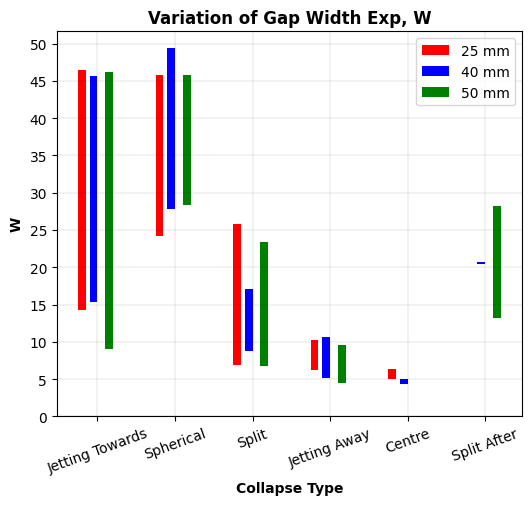

In [18]:
plt.subplots(figsize=(6, 5))

x = ["Jetting Towards", 'Spherical', 'Split', 'Jetting Away',  'Centre', 'Split After']
x_axis = np.arange(len(x))

#Plot for Gap Width Exp.
plt.bar(x_axis-0.2, max_W_25-min_W_25, 0.1, min_W_25, color = "red", label = "25 mm")
plt.bar(x_axis-0.05, max_W_40-min_W_40, 0.1, min_W_40, color = "blue", label = "40 mm")
plt.bar(x_axis+0.15, max_W_50-min_W_50, 0.1, min_W_50, color = "green", label = "50 mm")
plt.xticks(x_axis, x, rotation = 20), plt.yticks([i for i in range(0, 55, 5)])
plt.xlabel("Collapse Type",fontweight = 'bold'), plt.ylabel("W", fontweight = 'bold')
plt.legend(), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title("Variation of Gap Width Exp, W",fontweight = 'bold')
plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/Variation of W.png")
plt.show()

<ipython-input-19-61d986848d14>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


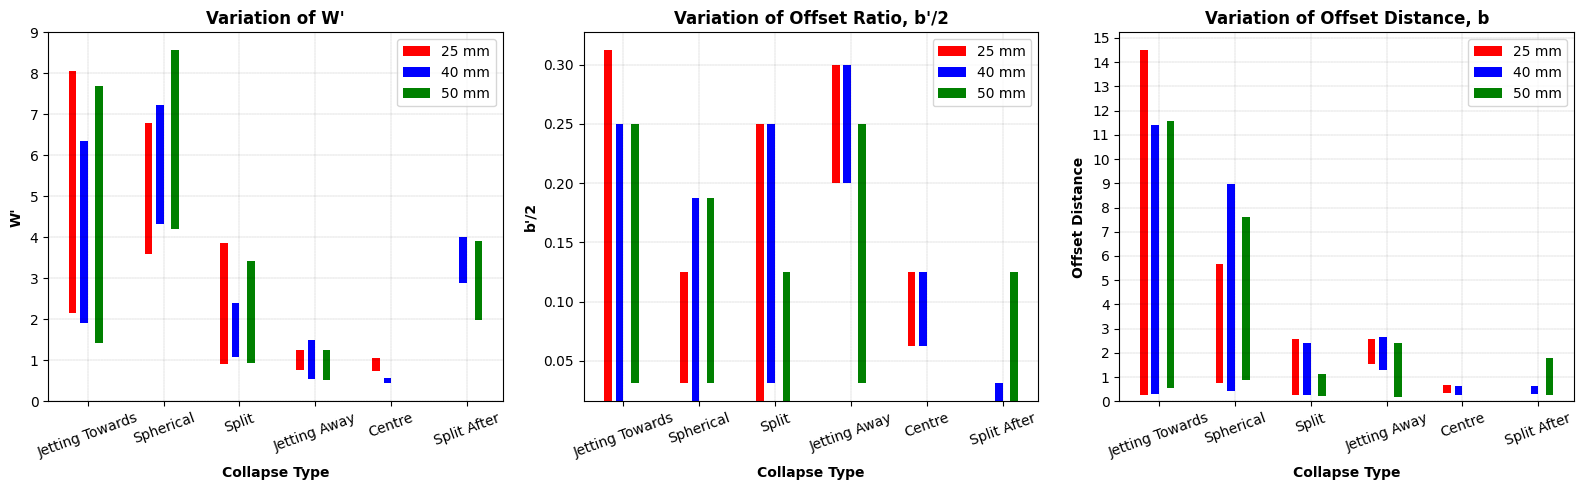

In [19]:
plt.subplots(figsize=(16, 5))

#Plot for W'
plt.subplot(1, 3, 1)
plt.bar(x_axis-0.2, max_W_dash_25-min_W_dash_25, 0.1, bottom = min_W_dash_25, color = "red", label = "25 mm")
plt.bar(x_axis-0.05, max_W_dash_40-min_W_dash_40, 0.1, bottom = min_W_dash_40, color = "blue", label = "40 mm")
plt.bar(x_axis+0.15, max_W_dash_50-min_W_dash_50, 0.1, bottom = min_W_dash_50, color = "green", label = "50 mm")
plt.xticks(x_axis, x, rotation = 20), plt.yticks([i for i in range(0, 10, 1)])
plt.xlabel("Collapse Type",fontweight = 'bold'), plt.ylabel("W'", fontweight = 'bold')
plt.legend(), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title("Variation of W'",fontweight = 'bold')

#Plot for Offset Ratio
plt.subplot(1, 3, 2)
plt.bar(x_axis-0.2, max_b_dash_25/2-min_b_dash_25/2, 0.1, bottom = min_b_dash_25/2, color = "red", label = "25 mm")
plt.bar(x_axis-0.05, max_b_dash_40/2-min_b_dash_40/2, 0.1, bottom = min_b_dash_40/2, color = "blue", label = "40 mm")
plt.bar(x_axis+0.15, max_b_dash_50/2-min_b_dash_50/2, 0.1, bottom = min_b_dash_50/2, color = "green", label = "50 mm")
plt.xticks(x_axis, x, rotation = 20)#, plt.yticks(np.linspace(0, 0.35, 5))
plt.xlabel("Collapse Type",fontweight = 'bold'), plt.ylabel("b'/2", fontweight = 'bold')
plt.legend(), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title("Variation of Offset Ratio, b'/2",fontweight = 'bold')

# Plot for Offset Distance
plt.subplot(1, 3, 3)
plt.bar(x_axis-0.2, max_b_25-min_b_25, 0.1, bottom = min_b_25, color = "red", label = "25 mm")
plt.bar(x_axis-0.05, max_b_40-min_b_40, 0.1, bottom = min_b_40, color = "blue", label = "40 mm")
plt.bar(x_axis+0.15, max_b_50-min_b_50, 0.1, bottom = min_b_50, color = "green", label = "50 mm")
plt.xticks(x_axis, x, rotation = 20), plt.yticks([i for i in range(0, 16, 1)])
plt.xlabel("Collapse Type",fontweight = 'bold'), plt.ylabel("Offset Distance", fontweight = 'bold')
plt.legend(), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title("Variation of Offset Distance, b",fontweight = 'bold')
plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/Variation of Params.png")

plt.tight_layout()
plt.show()

# Plots including Outliers

In [20]:
# Data For 40 mm
mm_40_data = pd.read_excel(filepath, sheet_name='Diameter_40mm')
mm_40_data.head()

required_data = mm_40_data[['Gap Width Experimental (in mm)', 'Offset ratio', "W'", 'Bubble Behaviour']]
required_data = required_data.dropna(how='all')
required_data = required_data.fillna(method='ffill')
required_data["b"] = required_data["Gap Width Experimental (in mm)"]*required_data['Offset ratio']
required_data["b'"] = 2 * required_data["b"]/required_data["Gap Width Experimental (in mm)"]
required_data.head()

mm_40_spherical_collapse = (required_data[required_data['Bubble Behaviour'] == 'Spherical Collapse']).sort_values(by = "b", ascending = 0)

min_W_40 = np.array([min(mm_40_jetting_towards["Gap Width Experimental (in mm)"]), min(mm_40_spherical_collapse["Gap Width Experimental (in mm)"]), min(mm_40_split_collapse["Gap Width Experimental (in mm)"]),
                     min(mm_40_jetting_away["Gap Width Experimental (in mm)"]), min(mm_40_centre_collapse["Gap Width Experimental (in mm)"]), min(mm_40_split_after_collapse["Gap Width Experimental (in mm)"])])
max_W_40 = np.array([max(mm_40_jetting_towards["Gap Width Experimental (in mm)"]), max(mm_40_spherical_collapse["Gap Width Experimental (in mm)"]), max(mm_40_split_collapse["Gap Width Experimental (in mm)"]),
                     max(mm_40_jetting_away["Gap Width Experimental (in mm)"]), max(mm_40_centre_collapse["Gap Width Experimental (in mm)"]), max(mm_40_split_after_collapse["Gap Width Experimental (in mm)"])])

min_W_dash_40 = np.array([min(mm_40_jetting_towards["W'"]), min(mm_40_spherical_collapse["W'"]), min(mm_40_split_collapse["W'"]), min(mm_40_jetting_away["W'"]), min(mm_40_centre_collapse["W'"]), min(mm_40_split_after_collapse["W'"])])
max_W_dash_40 = np.array([max(mm_40_jetting_towards["W'"]), max(mm_40_spherical_collapse["W'"]), max(mm_40_split_collapse["W'"]), max(mm_40_jetting_away["W'"]), max(mm_40_centre_collapse["W'"]), max(mm_40_split_after_collapse["W'"])])

min_b_40 = np.array([min(mm_40_jetting_towards["b"]), min(mm_40_spherical_collapse["b"]), min(mm_40_split_collapse["b"]), min(mm_40_jetting_away["b"]), min(mm_40_centre_collapse["b"]), min(mm_40_split_after_collapse["b"])])
max_b_40 = np.array([max(mm_40_jetting_towards["b"]), max(mm_40_spherical_collapse["b"]), max(mm_40_split_collapse["b"]), max(mm_40_jetting_away["b"]), max(mm_40_centre_collapse["b"]), max(mm_40_split_after_collapse["b"])])

min_b_dash_40 = np.array([min(mm_40_jetting_towards["b'"]), min(mm_40_spherical_collapse["b'"]), min(mm_40_split_collapse["b'"]), 0.4, min(mm_40_centre_collapse["b'"]), min(mm_40_split_after_collapse["b'"])])
max_b_dash_40 = np.array([max(mm_40_jetting_towards["b'"]), max(mm_40_spherical_collapse["b'"]), max(mm_40_split_collapse["b'"]), 0.6, max(mm_40_centre_collapse["b'"]), max(mm_40_split_after_collapse["b'"])])



#Data For 50 mm
mm_50_data = pd.read_excel(filepath, sheet_name='Diameter_50mm')
mm_50_data.head()

required_data = mm_50_data[['Gap Width Experimental (in mm)', 'Offset from Centre', "W'", 'Bubble Behaviour']]
required_data = required_data.dropna(how='all')
required_data = required_data.fillna(method='ffill')
required_data["b"] = required_data["Gap Width Experimental (in mm)"]*required_data['Offset from Centre']
required_data["b'"] = 2 * required_data["b"]/required_data["Gap Width Experimental (in mm)"]
required_data.head()

mm_50_spherical_collapse = (required_data[required_data['Bubble Behaviour'] == 'Spherical Collapse']).sort_values(by = "b", ascending = 0)

min_W_50 = np.array([min(mm_50_jetting_towards["Gap Width Experimental (in mm)"]), min(mm_50_spherical_collapse["Gap Width Experimental (in mm)"]), min(mm_50_split_collapse["Gap Width Experimental (in mm)"]),
            min(mm_50_jetting_away["Gap Width Experimental (in mm)"]), np.NaN, min(mm_50_split_after_collapse["Gap Width Experimental (in mm)"])])
max_W_50 = np.array([max(mm_50_jetting_towards["Gap Width Experimental (in mm)"]), max(mm_50_spherical_collapse["Gap Width Experimental (in mm)"]), max(mm_50_split_collapse["Gap Width Experimental (in mm)"]),
            max(mm_50_jetting_away["Gap Width Experimental (in mm)"]), np.NaN, max(mm_50_split_after_collapse["Gap Width Experimental (in mm)"])])

min_W_dash_50 = np.array([min(mm_50_jetting_towards["W'"]), min(mm_50_spherical_collapse["W'"]), min(mm_50_split_collapse["W'"]), min(mm_50_jetting_away["W'"]), np.NaN, min(mm_50_split_after_collapse["W'"])])
max_W_dash_50 = np.array([max(mm_50_jetting_towards["W'"]), max(mm_50_spherical_collapse["W'"]), max(mm_50_split_collapse["W'"]), max(mm_50_jetting_away["W'"]), np.NaN, max(mm_50_split_after_collapse["W'"])])

min_b_50 = np.array([min(mm_50_jetting_towards["b"]), min(mm_50_spherical_collapse["b"]), min(mm_50_split_collapse["b"]), min(mm_50_jetting_away["b"]), np.NaN, min(mm_50_split_after_collapse["b"])])
max_b_50 = np.array([max(mm_50_jetting_towards["b"]), max(mm_50_spherical_collapse["b"]), max(mm_50_split_collapse["b"]), max(mm_50_jetting_away["b"]), np.NaN, max(mm_50_split_after_collapse["b"])])

min_b_dash_50 = np.array([min(mm_50_jetting_towards["b'"]), min(mm_50_spherical_collapse["b'"]), min(mm_50_split_collapse["b'"]), min(mm_50_jetting_away["b'"]), np.NaN, min(mm_50_split_after_collapse["b'"])])
max_b_dash_50 = np.array([max(mm_50_jetting_towards["b'"]), max(mm_50_spherical_collapse["b'"]), max(mm_50_split_collapse["b'"]), max(mm_50_jetting_away["b'"]), np.NaN, max(mm_50_split_after_collapse["b'"])])

<ipython-input-21-d682ecc51900>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


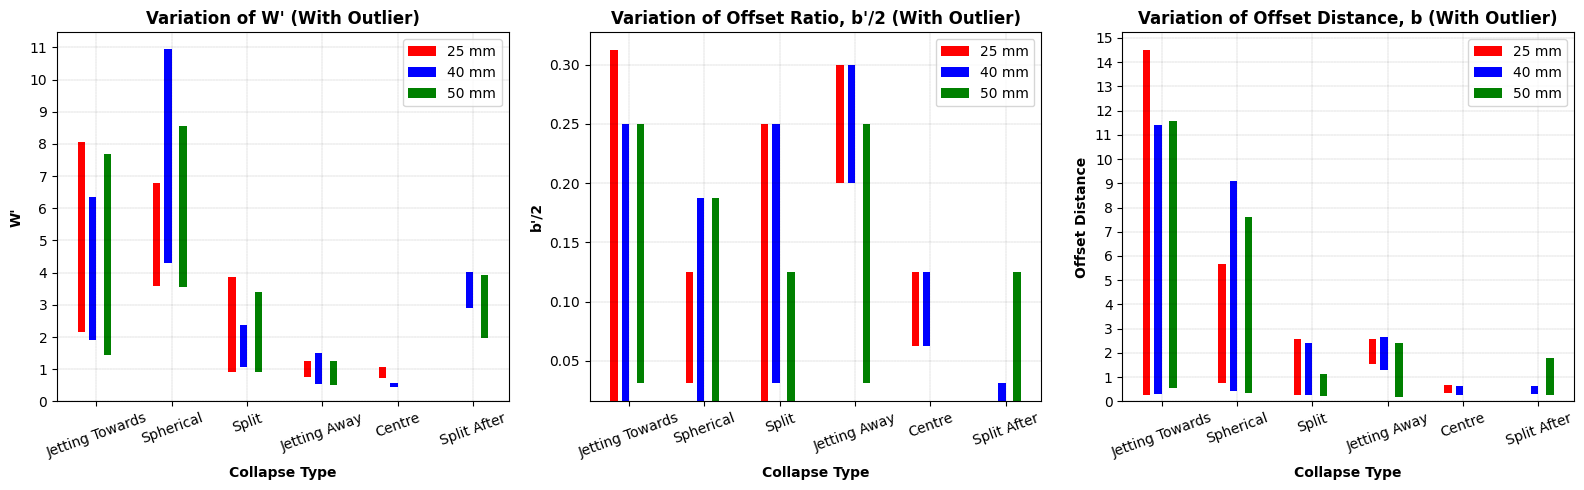

In [21]:
x = ["Jetting Towards", 'Spherical', 'Split', 'Jetting Away',  'Centre', 'Split After']
x_axis = np.arange(len(x))
plt.subplots(figsize=(16, 5))

#Plot for W'
plt.subplot(1, 3, 1)
plt.bar(x_axis-0.2, max_W_dash_25-min_W_dash_25, 0.1, bottom = min_W_dash_25, color = "red", label = "25 mm")
plt.bar(x_axis-0.05, max_W_dash_40-min_W_dash_40, 0.1, bottom = min_W_dash_40, color = "blue", label = "40 mm")
plt.bar(x_axis+0.15, max_W_dash_50-min_W_dash_50, 0.1, bottom = min_W_dash_50, color = "green", label = "50 mm")
plt.xticks(x_axis, x, rotation = 20), plt.yticks([i for i in range(0, 12, 1)])
plt.xlabel("Collapse Type",fontweight = 'bold'), plt.ylabel("W'", fontweight = 'bold')
plt.legend(), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title("Variation of W' (With Outlier)",fontweight = 'bold')

#Plot for Offset Ratio
plt.subplot(1, 3, 2)
plt.bar(x_axis-0.2, max_b_dash_25/2-min_b_dash_25/2, 0.1, bottom = min_b_dash_25/2, color = "red", label = "25 mm")
plt.bar(x_axis-0.05, max_b_dash_40/2-min_b_dash_40/2, 0.1, bottom = min_b_dash_40/2, color = "blue", label = "40 mm")
plt.bar(x_axis+0.15, max_b_dash_50/2-min_b_dash_50/2, 0.1, bottom = min_b_dash_50/2, color = "green", label = "50 mm")
plt.xticks(x_axis, x, rotation = 20)#, plt.yticks(np.linspace(0, 0.35, 5))
plt.xlabel("Collapse Type",fontweight = 'bold'), plt.ylabel("b'/2", fontweight = 'bold')
plt.legend(), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title("Variation of Offset Ratio, b'/2 (With Outlier)",fontweight = 'bold')

# Plot for Offset Distance
plt.subplot(1, 3, 3)
plt.bar(x_axis-0.2, max_b_25-min_b_25, 0.1, bottom = min_b_25, color = "red", label = "25 mm")
plt.bar(x_axis-0.05, max_b_40-min_b_40, 0.1, bottom = min_b_40, color = "blue", label = "40 mm")
plt.bar(x_axis+0.15, max_b_50-min_b_50, 0.1, bottom = min_b_50, color = "green", label = "50 mm")
plt.xticks(x_axis, x, rotation = 20), plt.yticks([i for i in range(0, 16, 1)])
plt.xlabel("Collapse Type",fontweight = 'bold'), plt.ylabel("Offset Distance", fontweight = 'bold')
plt.legend(), plt.grid(True, color='black', linestyle='--', linewidth=0.1)
plt.title("Variation of Offset Distance, b (With Outlier)",fontweight = 'bold')
plt.savefig("/content/drive/MyDrive/IITH SURE/Plots/Variation of Params (with Outliers).png")

plt.tight_layout()
plt.show()